In [73]:
import pandas as pd
import numpy as np
ers = pd.read_csv('ers_updated.csv')

In [74]:
# S. Bureau of Economic Analysis, Balance on Current Account, NIPA's [NETFI], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/NETFI, March 29, 2024.
df_cab = pd.read_csv('NETFI.csv')
df_cab = df_cab.rename({'NETFI': 'Balance_Curr_Acc'}, axis=1)

In [75]:
df_cab.head(2)

,DATE,Balance_Curr_Acc
0,1947-01-01,9.405
1,1947-04-01,9.873


In [76]:
df_debt = pd.read_csv('GFDEBTN.csv')
df_debt = df_debt.rename({'GFDEBTN': 'Public_debt'}, axis=1)
#U.S. Department of the Treasury. Fiscal Service, Federal Debt: Total Public Debt [GFDEBTN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GFDEBTN, March 27, 2024.
df_debt.head(2)

,DATE,Public_debt
0,1966-01-01,320999.0
1,1966-04-01,316097.0


In [77]:
df_gdp = pd.read_csv('GDPC1.csv')
df_gdp = df_gdp.rename({'GDPC1': 'GDP'}, axis=1)
#U.S. Bureau of Economic Analysis, Real Gross Domestic Product [GDPC1], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDPC1, March 28, 2024.
df_gdp.head(2)

,DATE,GDP
0,1947-01-01,2182.681
1,1947-04-01,2176.892


In [78]:
df_infl = pd.read_csv('PCECTPI_quart.csv')
#https://fred.stlouisfed.org/series/PCECTPI
df_inf = pd.merge(ers, df_infl, on='DATE', how='outer')
df_inf = df_inf.rename({'PCECTPI': 'Infl'}, axis=1)
df_inf.to_csv('inflation.csv')

In [79]:
df_m2 = pd.read_csv('M2SL.csv')

In [80]:
import pandas as pd

# Your list of DataFrames
pdList = [df_cab, df_debt, df_gdp, df_m2, ers]

# Initialize merged_df with the first DataFrame
merged_df = pdList[0]

# Merge each DataFrame on 'DATE' using an outer join
for df in pdList[1:]:
    merged_df = pd.merge(merged_df, df, on='DATE', how='outer')

# Now merged_df contains the merged data with 'DATE' as datetime


In [81]:
merged_df.to_csv('macros.csv')

In [82]:
min_date_eur = merged_df[merged_df['USD to EUR'].notnull()]['DATE'].min()

# Drop rows in the DataFrame where 'DATE' is less than the minimum date of 'USD to EUR'.
merged_df = merged_df[merged_df['DATE'] >= min_date_eur]

In [83]:
merged_df.to_csv('macros.csv')

In [84]:
macros =merged_df

In [85]:
import pandas as pd

# Assuming macros is your DataFrame with the described columns
# Check rows where all the last three columns are null
rows_with_all_nulls = macros[['USD to JPY', 'USD to EUR', 'USD to GBP']].isna().all(axis=1)

# Drop these rows from the DataFrame
macros = macros[~rows_with_all_nulls]

# Now, macros has rows dropped where 'USD to JPY', 'USD to EUR', 'USD to GBP' were all NaN


In [86]:
# Convert 'DATE' column to datetime
macros['DATE'] = pd.to_datetime(macros['DATE'])

# Display the first few rows to confirm the conversion
macros.head()

C:\Users\aghab\AppData\Local\Temp\ipykernel_30840\380562467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macros['DATE'] = pd.to_datetime(macros['DATE'])


,DATE,Balance_Curr_Acc,Public_debt,GDP,M2SL,USD to JPY,USD to EUR,USD to GBP
209,1999-04-01,-262.217,5638780.0,13426.748,4460.7,0.008320,1.0782,1.6063
210,1999-07-01,-293.375,5656271.0,13604.771,4534.5,0.008265,1.0236,1.5765
211,1999-10-01,-316.669,5776091.0,13827.980,4591.5,0.009517,1.0718,1.6550
219,2001-10-01,-350.783,5943439.0,14253.574,5337.1,0.008315,0.9159,1.4785
221,2002-04-01,-456.414,6126469.0,14460.848,5495.4,0.007501,0.8806,1.4407


Feature Engineering.\
Since there are quite a few missing values in the macros columns, I decided to use linear interpolation to fill in the missing values. be mindful that i applied it twice
DATE                 0
Balance_Curr_Acc    61
Public_debt         61
GDP                 61
M2SL                19
USD to JPY           0
USD to EUR           0
USD to GBP           0
dtype: int64



In [106]:
macros = imputed

In [105]:
macros.isna().sum()

DATE                 0
Balance_Curr_Acc    61
Public_debt         61
GDP                 61
M2SL                19
USD to JPY           0
USD to EUR           0
USD to GBP           0
dtype: int64

In [101]:
imputed = macros.copy()

In [100]:
# Ensure the DataFrame is sorted by 'DATE'
macros.sort_values('DATE', inplace=True)

# Apply linear interpolation to fill missing values
macros[['Balance_Curr_Acc', 'Public_debt', 'GDP', 'M2SL']] = macros[['Balance_Curr_Acc', 'Public_debt', 'GDP', 'M2SL']].interpolate(method='linear')

# Check the result by displaying rows with previously missing values
macros.loc[macros['Balance_Curr_Acc'].isna() | macros['Public_debt'].isna() | macros['GDP'].isna() | macros['M2SL'].isna()]


C:\Users\aghab\AppData\Local\Temp\ipykernel_30840\3802516643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macros.sort_values('DATE', inplace=True)
C:\Users\aghab\AppData\Local\Temp\ipykernel_30840\3802516643.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macros[['Balance_Curr_Acc', 'Public_debt', 'GDP', 'M2SL']] = macros[['Balance_Curr_Acc', 'Public_debt', 'GDP', 'M2SL']].interpolate(method='linear')


,DATE,Balance_Curr_Acc,Public_debt,GDP,M2SL,USD to JPY,USD to EUR,USD to GBP
830,1999-01-04,NaN,NaN,NaN,NaN,0.008917,1.1812,1.6581
831,1999-01-05,NaN,NaN,NaN,NaN,0.008997,1.1760,1.6566
832,1999-01-06,NaN,NaN,NaN,NaN,0.008867,1.1636,1.6547
833,1999-01-07,NaN,NaN,NaN,NaN,0.008953,1.1672,1.6495
834,1999-01-08,NaN,NaN,NaN,NaN,0.008967,1.1554,1.6405
...,...,...,...,...,...,...,...,...
886,1999-03-25,NaN,NaN,NaN,4454.482609,0.008471,1.0871,1.6314
887,1999-03-26,NaN,NaN,NaN,4455.726087,0.008313,1.0743,1.6205
888,1999-03-29,NaN,NaN,NaN,4456.969565,0.008349,1.0716,1.6140
889,1999-03-30,NaN,NaN,NaN,4458.213043,0.008326,1.0732,1.6115


In [103]:
imputed[['Balance_Curr_Acc', 'Public_debt', 'GDP', 'M2SL']] = imputed[['Balance_Curr_Acc', 'Public_debt', 'GDP', 'M2SL']].ffill().bfill()

# Check if there are any remaining missing values after ffill and bfill
remaining_missing_data = imputed[['Balance_Curr_Acc', 'Public_debt', 'GDP', 'M2SL']].isna().sum()
remaining_missing_data

Balance_Curr_Acc    0
Public_debt         0
GDP                 0
M2SL                0
dtype: int64

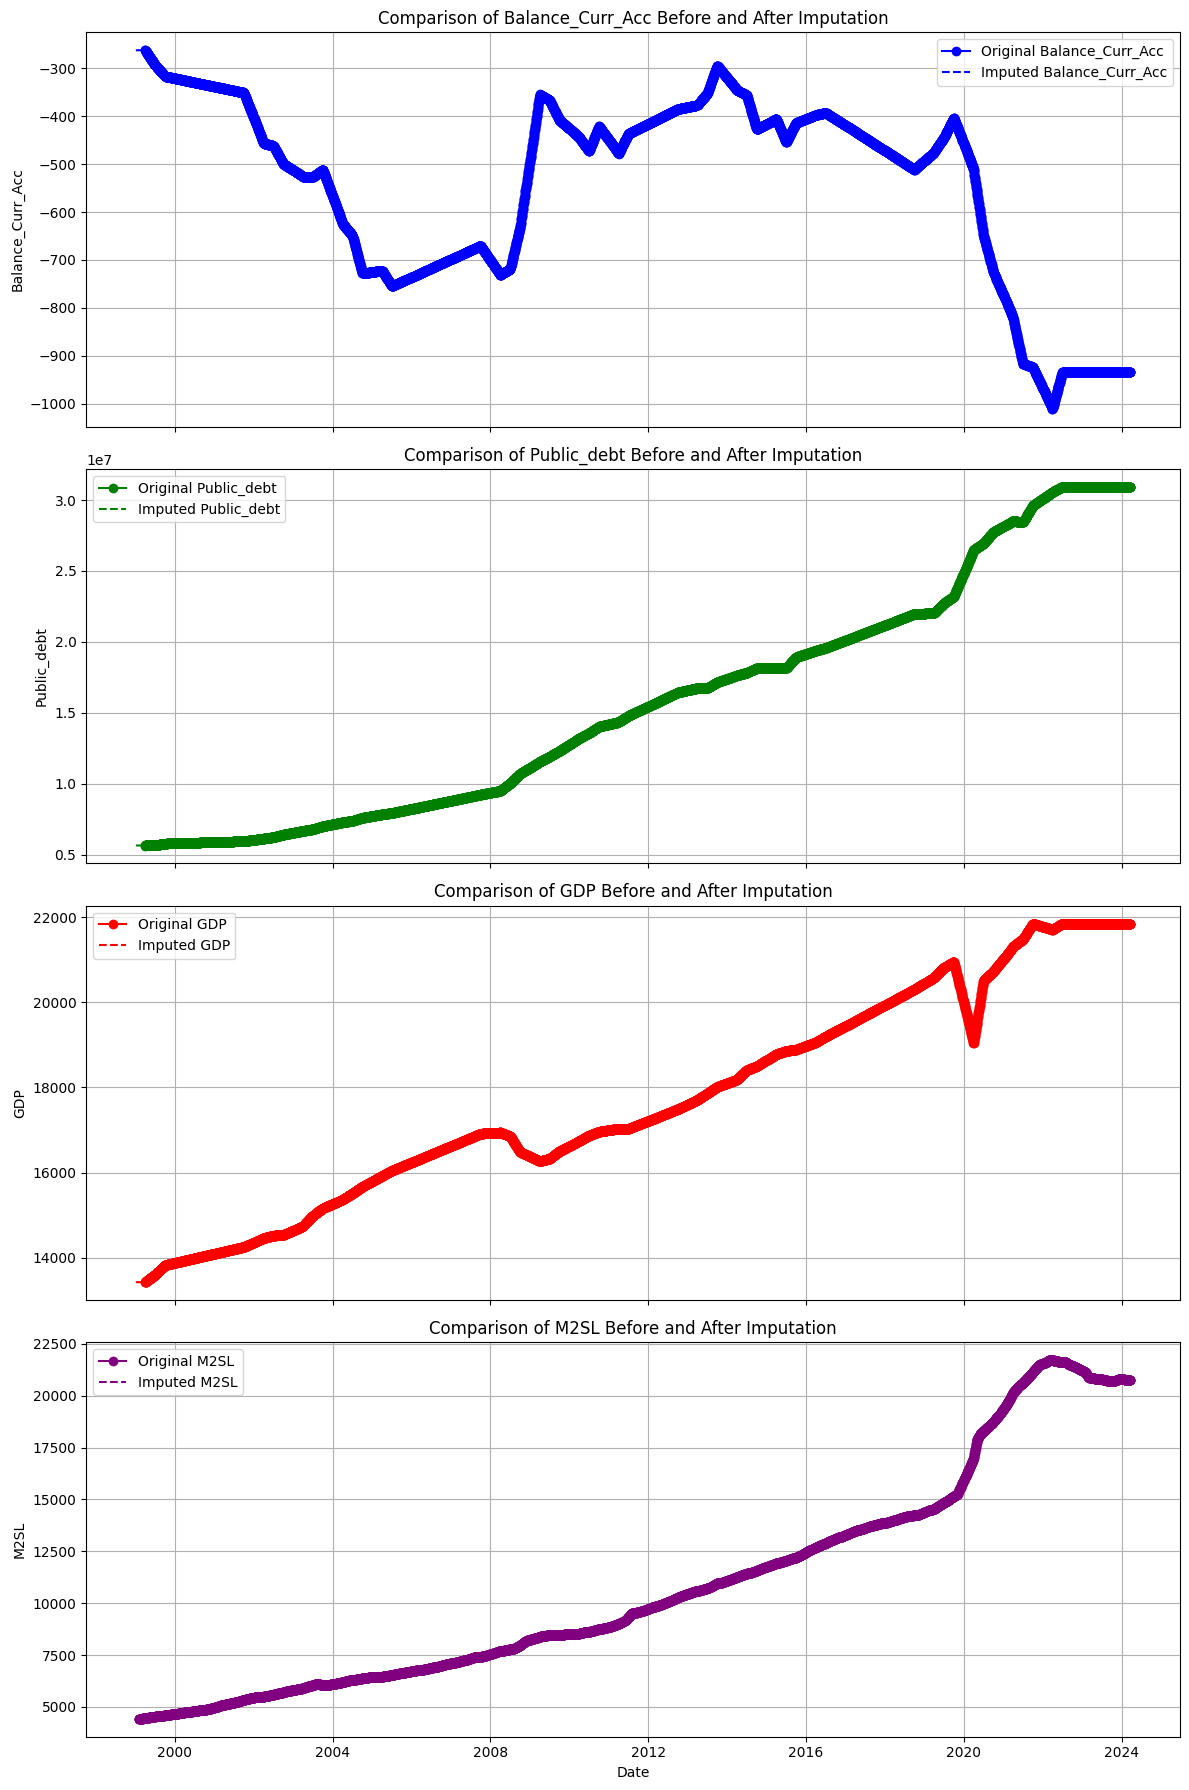

In [104]:
import matplotlib.pyplot as plt
imputed[['Balance_Curr_Acc', 'Public_debt', 'GDP', 'M2SL']] = imputed[['Balance_Curr_Acc', 'Public_debt', 'GDP', 'M2SL']].ffill().bfill()

# Create a subplot for each variable to compare before and after imputation
fig, axs = plt.subplots(4, 1, figsize=(12, 18), sharex=True)

# List of columns to plot
columns = ['Balance_Curr_Acc', 'Public_debt', 'GDP', 'M2SL']
colors = ['blue', 'green', 'red', 'purple']  # Different color for each plot for clarity

# Loop through the columns and create a plot for each
for i, col in enumerate(columns):
    axs[i].plot(macros['DATE'], macros[col], label=f'Original {col}', marker='o', linestyle='-', color=colors[i])
    axs[i].plot(imputed['DATE'], imputed[col], label=f'Imputed {col}', linestyle='--', color=colors[i])
    axs[i].set_title(f'Comparison of {col} Before and After Imputation')
    axs[i].set_ylabel(col)
    axs[i].legend()
    axs[i].grid(True)

# Improve layout and show plot
plt.xlabel('Date')
plt.tight_layout()
plt.show()

<AxesSubplot: >

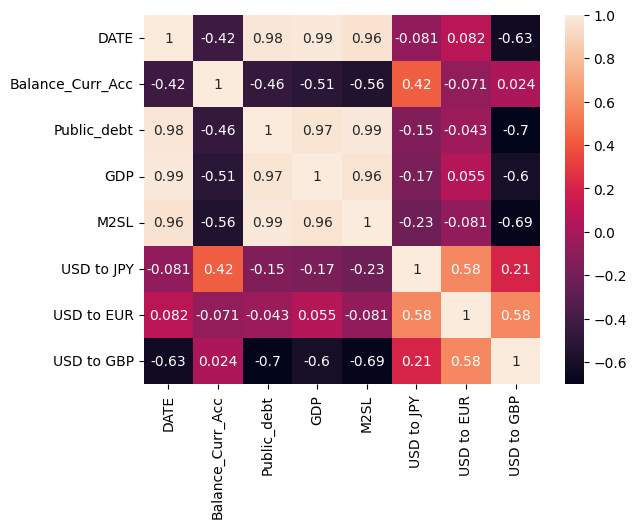

In [109]:
import seaborn as sns

corr = macros.corr()
sns.heatmap(corr, annot=True)

1. Public Debt, GDP, and M2SL: These three variables (Public Debt, GDP, Money Supply Level 2) have very strong positive correlations among each other, with coefficients close to or above 0.96. This suggests that as the economy grows (indicated by GDP), public debt and money supply tend to increase proportionally, which is typical in economic cycles where government borrowing and money supply expansion often accompany economic growth.\
DATE with GDP, Public Debt, and M2SL: The correlation values close to or above 0.95 between these indicators and DATE indicate that these metrics have grown over time, which is typical in a growing economy.\
2. Negative Correlations with Exchange Rates:\
Exchange Rates (USD to GBP, USD to JPY, USD to EUR) and Domestic Economic Indicators: Negative correlations with Public Debt, GDP, and M2SL suggest that as the domestic economy strengthens (or expands), the local currency might be appreciating against foreign currencies or vice versa. For example, a stronger GDP could be associated with a stronger domestic currency, decreasing the USD to foreign currency value.\
Strong negative correlation between USD to GBP with Public Debt and M2SL: Values like -0.7026 with Public Debt and -0.6864 with M2SL suggest significant depreciations of USD against GBP as domestic debt or money supply increases.\
3. Relationships Among Exchange Rates:\
Correlations among USD to JPY, USD to EUR, and USD to GBP: Positive correlations (especially USD to EUR and USD to GBP showing 0.5773) indicate that movements in these exchange rates are somewhat synchronized. If USD depreciates against one, it tends to depreciate against others, possibly due to overarching economic trends affecting the USD or global market sentiments.\
4. Balance of Current Account (Balance_Curr_Acc):\
Inverse relationship with Domestic Indicators: Negative correlations with GDP (-0.5115) and M2SL (-0.5555) could suggest that a larger balance of current account deficit correlates with stronger economic activity. A deficit in the current account often results from higher domestic consumption and investment relative to savings, which is not uncommon in more active economies.\
Positive correlation with USD to JPY: A coefficient of 0.4238 indicates that a higher deficit (or lower surplus) in the current account may be associated with a weaker USD relative to JPY.\

In [110]:
corr

,DATE,Balance_Curr_Acc,Public_debt,GDP,M2SL,USD to JPY,USD to EUR,USD to GBP
DATE,1.000000,-0.423695,0.978443,0.988281,0.956890,-0.081156,0.082031,-0.631518
Balance_Curr_Acc,-0.423695,1.000000,-0.463736,-0.511461,-0.555457,0.423756,-0.070908,0.023514
Public_debt,0.978443,-0.463736,1.000000,0.971005,0.990808,-0.146993,-0.043402,-0.702576
GDP,0.988281,-0.511461,0.971005,1.000000,0.964251,-0.170336,0.055132,-0.599806
M2SL,0.956890,-0.555457,0.990808,0.964251,1.000000,-0.228590,-0.081045,-0.686375
USD to JPY,-0.081156,0.423756,-0.146993,-0.170336,-0.228590,1.000000,0.577168,0.207502
USD to EUR,0.082031,-0.070908,-0.043402,0.055132,-0.081045,0.577168,1.000000,0.577307
USD to GBP,-0.631518,0.023514,-0.702576,-0.599806,-0.686375,0.207502,0.577307,1.000000


In [111]:
macros.to_csv('macros.csv')

In [120]:
#adding interest rates
df_ir = pd.read_csv('DFF.csv')
df_ir['DATE'] = pd.to_datetime(df_ir['DATE'])
df_ir.set_index('DATE', inplace=True)
df_ir.head(2)

,DFF
DATE,
1954-07-01,1.13
1954-07-02,1.25


In [121]:
df_ir = df_ir.rename({'DFF': 'Int_rate'}, axis=1)

In [124]:
df_ir.to_csv('DFF.csv', index=False)

In [127]:
df = pd.read_csv('macros_updated.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df.head(2)

,Balance_Curr_Acc,Public_debt,GDP,M2SL,USD to JPY,USD to EUR,USD to GBP,year,month,day_of_week
DATE,,,,,,,,,,
1999-01-04,-262.217,5638780.0,13426.748,4425.3,0.008917,1.1812,1.6581,1999,1,0
1999-01-05,-262.217,5638780.0,13426.748,4425.3,0.008997,1.1760,1.6566,1999,1,1


In [130]:
df_new = df.join(df_ir)
df_new

,Balance_Curr_Acc,Public_debt,GDP,M2SL,USD to JPY,USD to EUR,USD to GBP,year,month,day_of_week,Int_rate
DATE,,,,,,,,,,,
1999-01-04,-262.217,5638780.0,13426.748,4425.3,0.008917,1.1812,1.6581,1999,1,0,5.04
1999-01-05,-262.217,5638780.0,13426.748,4425.3,0.008997,1.1760,1.6566,1999,1,1,4.54
1999-01-06,-262.217,5638780.0,13426.748,4425.3,0.008867,1.1636,1.6547,1999,1,2,4.23
1999-01-07,-262.217,5638780.0,13426.748,4425.3,0.008953,1.1672,1.6495,1999,1,3,4.49
1999-01-08,-262.217,5638780.0,13426.748,4425.3,0.008967,1.1554,1.6405,1999,1,4,4.74
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-18,-934.571,30928912.0,21851.134,20783.6,0.006706,1.0886,1.2736,2024,3,0,5.33
2024-03-19,-934.571,30928912.0,21851.134,20783.6,0.006634,1.0859,1.2713,2024,3,1,5.33
2024-03-20,-934.571,30928912.0,21851.134,20783.6,0.006594,1.0856,1.2713,2024,3,2,5.33


In [138]:
df_new.to_csv('macros_2.csv', index='DATE')

In [3]:
import pandas as pd

# Load the datasets
financials = pd.read_csv('financials.csv')
macros_2 = pd.read_csv('macros_2.csv')

# Ensure the DATE column is the same data type, ideally datetime
financials['DATE'] = pd.to_datetime(financials['DATE'])
macros_2['DATE'] = pd.to_datetime(macros_2['DATE'])

# Optional: Standardize exchange rates by rounding (if needed)
exchange_cols = ['USD to JPY', 'USD to EUR', 'USD to GBP']
for col in exchange_cols:
    financials[col] = financials[col].round(4)  # Adjust rounding as needed
    macros_2[col] = macros_2[col].round(4)      # Adjust rounding as needed

# Merge the datasets on the 'DATE' and exchange rate columns
combined_data = pd.merge(financials, macros_2, on=['DATE'] + exchange_cols, how='outer')

# Handle missing values using interpolation (suitable for time series)
combined_data.interpolate(method='linear', inplace=True)

# Display the first 5 rows of the combined dataset
print(combined_data.head(5))

# Save the combined dataset to a new CSV file
combined_data.to_csv('combined_dataset.csv', index=False)

print("Datasets have been merged and saved as 'combined_dataset.csv'.")


        DATE  USD to JPY  USD to EUR  USD to GBP     Close_SP  Adj Close_SP  \
0 1999-01-04      0.0089      1.1812      1.6581  1228.099976   1228.099976   
1 1999-01-05      0.0090      1.1760      1.6566  1244.780029   1244.780029   
2 1999-01-06      0.0089      1.1636      1.6547  1272.339966   1272.339966   
3 1999-01-07      0.0090      1.1672      1.6495  1269.729980   1269.729980   
4 1999-01-08      0.0090      1.1554      1.6405  1275.089966   1275.089966   

     Volume_SP  NASDAQCOM  Close_DJ  Balance_Curr_Acc  Public_debt        GDP  \
0  877000000.0    2208.05   9184.27          -262.217    5638780.0  13426.748   
1  775000000.0    2251.27   9311.19          -262.217    5638780.0  13426.748   
2  986900000.0    2320.86   9544.97          -262.217    5638780.0  13426.748   
3  863000000.0    2326.09   9537.76          -262.217    5638780.0  13426.748   
4  937800000.0    2344.41   9643.32          -262.217    5638780.0  13426.748   

     M2SL    year  month  day_of_week 